In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pylab as plt

# Player Movement

In [2]:
injury = pd.read_csv('data/InjuryRecord.csv')
player = pd.read_csv('data/PlayerTrackData.csv')
plays = pd.read_csv('data/PlayList.csv')

In [3]:
player['event'].unique()

array(['huddle_start_offense', nan, 'huddle_break_offense', 'line_set',
       'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_incomplete', 'pass_outcome_caught', 'first_contact',
       'out_of_bounds', 'man_in_motion', 'handoff', 'tackle',
       'penalty_flag', 'penalty_accepted', 'touchdown', 'shift',
       'qb_kneel', 'fumble', 'fumble_offense_recovered', 'lateral',
       'penalty_declined', 'qb_sack', 'pass_shovel',
       'pass_outcome_touchdown', 'run', 'pass_outcome_interception',
       'qb_strip_sack', 'two_point_conversion', 'pass_tipped',
       'fumble_defense_recovered', 'two_minute_warning', 'two_point_play',
       'snap_direct', 'play_action', 'qb_spike', 'pass_lateral',
       'touchback', 'timeout_tv', 'timeout', 'kickoff_play',
       'onside_kick', 'kick_received', 'safety', 'field_goal_attempt',
       'field_goal', 'punt_play', 'punt', 'punt_land', 'fair_catch',
       'punt_downed', 'punt_received', 'punt_fake', 'kickoff',
       'kickoff_la

## Wrangle

In [4]:
plays.head(2)

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB


In [5]:
player.head(2)

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12


In [6]:
injury.head(2)

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0


In [7]:
all_df = player.merge(plays,on='PlayKey',how='left')

In [8]:
all_df = all_df.merge(injury,how='left',on='PlayKey')

In [9]:
injury_plays = injury['PlayKey'].dropna()

In [10]:
injury_df = all_df.loc[all_df['PlayKey'].isin(injury_plays)]
non_injury_df = all_df.loc[~all_df['PlayKey'].isin(injury_plays)]

In [11]:
injury_df.shape

(22195, 30)

In [12]:
non_injury_df.shape

(76344843, 30)

In [13]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

## Analysis of speed on Synthetic vs Natural

#### Injury

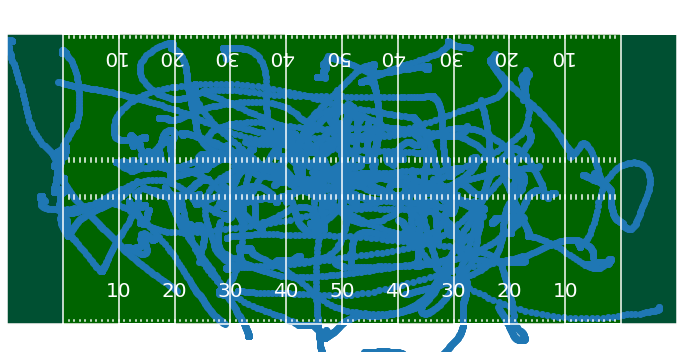

In [36]:
fig, ax = create_football_field()
plt.scatter(x=injury_df['x'],y=injury_df['y'])

In [14]:
injury_df[0:233]['event'].unique()

array(['line_set', nan, 'ball_snap', 'handoff', 'first_contact', 'tackle'],
      dtype=object)

#### Speed from handoff to first contact

##### Run
Lets look at the speed and orientation at first contact and then the acceleration from first contact to tackle

In [29]:
handoff_keys = injury_df.loc[(injury_df['event'] == 'handoff')]['PlayKey']

In [26]:
injury_df.loc[injury_df['PlayKey'].isin(handoff_keys.values)]['event'].value_counts()

handoff                     21
ball_snap                   21
line_set                    20
tackle                      19
first_contact               18
huddle_break_offense        15
huddle_start_offense         9
man_in_motion                5
shift                        3
penalty_flag                 1
fumble_defense_recovered     1
out_of_bounds                1
fumble                       1
touchdown                    1
Name: event, dtype: int64

In [30]:
injury_df.loc[injury_df['PlayKey'].isin(handoff_keys.values)]

,PlayKey,time,event,x,y,dir,dis,o,s,PlayerKey_x,...,Position,PositionGroup,PlayerKey_y,GameID_y,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
2085848,31070-3-7,0.0,line_set,44.07,32.14,23.31,0.00,174.83,0.03,31070,...,RB,RB,31070.0,31070-3,Knee,Natural,1.0,1.0,1.0,1.0
2085849,31070-3-7,0.1,NaN,44.08,32.14,20.18,0.00,175.09,0.03,31070,...,RB,RB,31070.0,31070-3,Knee,Natural,1.0,1.0,1.0,1.0
2085850,31070-3-7,0.2,NaN,44.08,32.14,16.53,0.00,175.35,0.03,31070,...,RB,RB,31070.0,31070-3,Knee,Natural,1.0,1.0,1.0,1.0
2085851,31070-3-7,0.3,NaN,44.08,32.14,13.23,0.00,175.60,0.02,31070,...,RB,RB,31070.0,31070-3,Knee,Natural,1.0,1.0,1.0,1.0
2085852,31070-3-7,0.4,NaN,44.08,32.14,9.78,0.00,175.82,0.02,31070,...,RB,RB,31070.0,31070-3,Knee,Natural,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75671026,47382-3-34,10.0,NaN,62.12,28.64,236.21,0.03,296.25,0.59,47382,...,LB,LB,47382.0,47382-3,Ankle,Synthetic,1.0,0.0,0.0,0.0
75671027,47382-3-34,10.1,NaN,62.10,28.63,233.18,0.02,279.07,0.43,47382,...,LB,LB,47382.0,47382-3,Ankle,Synthetic,1.0,0.0,0.0,0.0
75671028,47382-3-34,10.2,tackle,62.10,28.61,224.96,0.02,279.07,0.34,47382,...,LB,LB,47382.0,47382-3,Ankle,Synthetic,1.0,0.0,0.0,0.0
75671029,47382-3-34,10.3,NaN,62.10,28.61,218.87,0.00,270.71,0.24,47382,...,LB,LB,47382.0,47382-3,Ankle,Synthetic,1.0,0.0,0.0,0.0


#### Non Injury

## Analysis of direction on Synthetic vs Natural

#### Non Injury

#### Injury